In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import math


In [ ]:
df = pd.read_csv("/content/Bitcoin Historical Data (Daily new).csv")

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,29-04-2025,"95,176.7","94,995.4","95,453.4","94,210.1",53.75K,0.19%
1,28-04-2025,"94,995.0","93,742.5","95,580.3","92,818.9",73.63K,1.34%
2,27-04-2025,"93,742.5","94,631.4","95,324.4","93,640.7",36.66K,-0.94%
3,26-04-2025,"94,631.4","94,669.3","95,207.0","93,891.8",33.77K,-0.05%
4,25-04-2025,"94,676.9","93,979.4","95,718.6","92,867.2",92.04K,0.74%


In [ ]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [ ]:
df = df.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])

In [ ]:
df.head()

,Date,Price
0,29-04-2025,"95,176.7"
1,28-04-2025,"94,995.0"
2,27-04-2025,"93,742.5"
3,26-04-2025,"94,631.4"
4,25-04-2025,"94,676.9"


In [ ]:
df.columns

Index(['Date', 'Price'], dtype='object')

In [ ]:
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float).astype(int)
df.head()

,Date,Price
0,29-04-2025,95176
1,28-04-2025,94995
2,27-04-2025,93742
3,26-04-2025,94631
4,25-04-2025,94676


In [ ]:
print(df['Date'].dtype)


object


In [ ]:
df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.set_index('Date')

df.head()


,Price
Date,
2025-04-29,95176
2025-04-28,94995
2025-04-27,93742
2025-04-26,94631
2025-04-25,94676


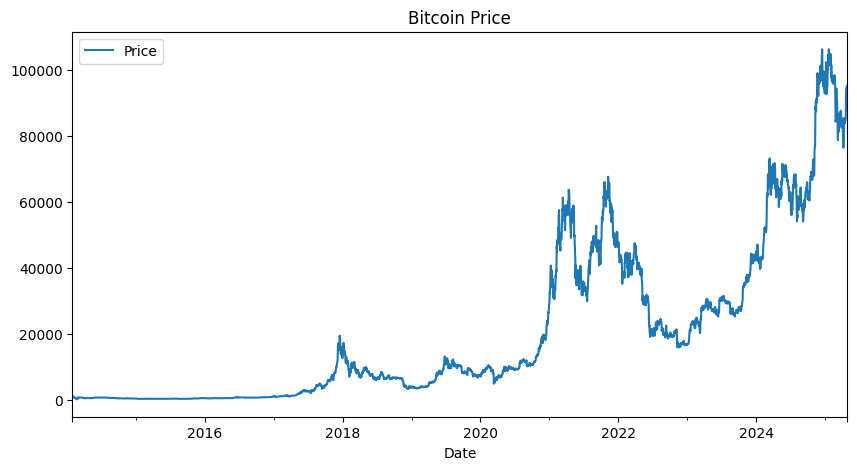

In [ ]:
df.plot(figsize=(10,5), title="Bitcoin Price")
plt.show()

In [ ]:
df = df.sort_index(ascending=True)
df.head()


,Price
Date,
2014-01-29,925
2014-01-30,941
2014-01-31,938
2014-02-01,940
2014-02-02,953


In [ ]:
df['MA_365'] = df['Price'].rolling(window = 365).mean()
df['MA_100'] = df['Price'].rolling(window = 100).mean()

NameError: name 'df' is not defined

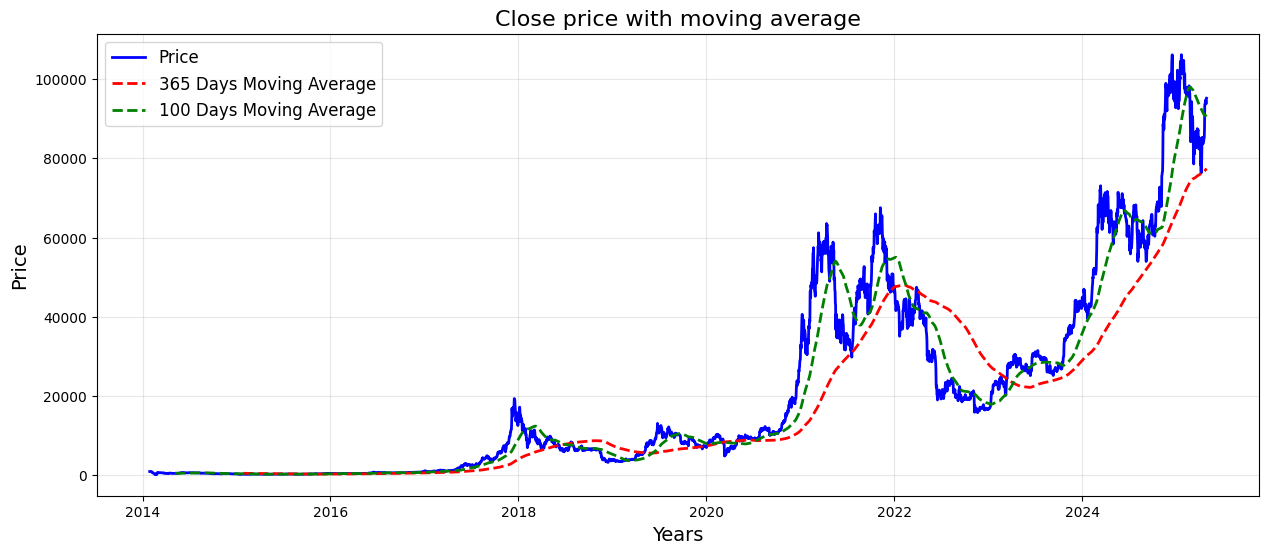

In [ ]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(df.index, df['Price'], label = 'Price', color = 'blue', linewidth =2)
plt.plot(df.index, df['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(df.index, df['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
# LSTM-> Long short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Price']].dropna())

In [ ]:
len(scaled_data)

4109

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Prepare data for lstm
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [ ]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.0020
Epoch 2/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 2.5274e-04
Epoch 3/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 1.8866e-04
Epoch 4/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 1.6714e-04
Epoch 5/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 1.3619e-04
Epoch 6/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 1.1533e-04
Epoch 7/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 1.2450e-04
Epoch 8/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 1.0941e-04
Epoch 9/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.1685e-04
Epoch 10/10
722/722 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 1.2240e-04


In [ ]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(inv_y_test, inv_predictions)
mse = mean_squared_error(inv_y_test, inv_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(inv_y_test, inv_predictions)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

mape = np.mean(np.abs((inv_y_test - inv_predictions) / inv_y_test)) * 100
print(f"MAPE: {mape:.2f}%")

MAE: 4132.4566
RMSE: 4756.6434
R² Score: 0.9042
MAPE: 5.22%


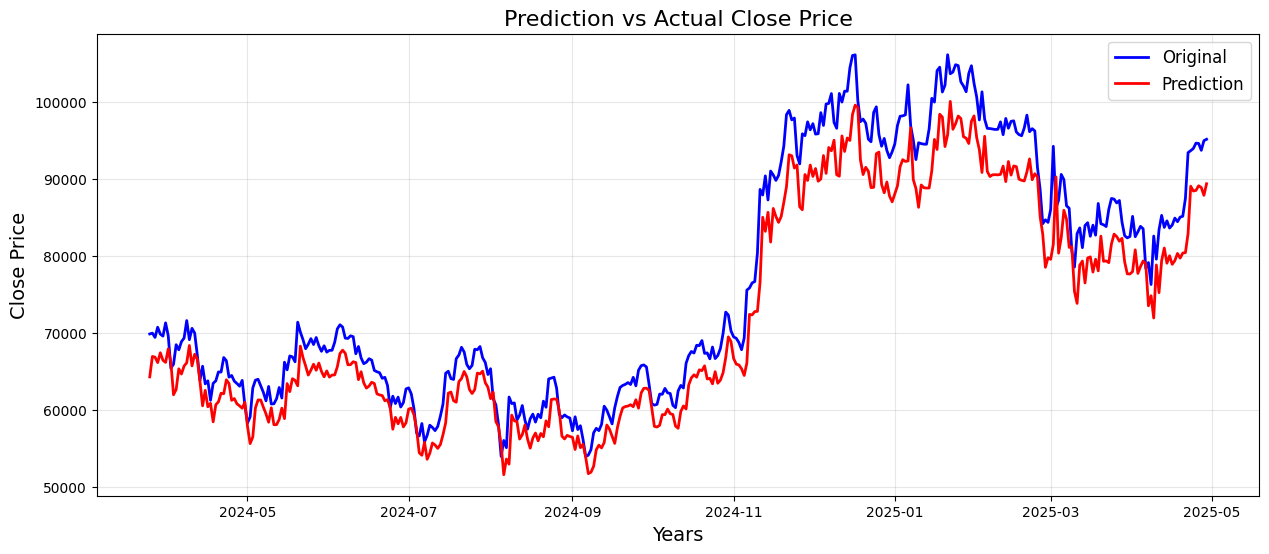

In [ ]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten(),
    }, index = df.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [ ]:
future_predictions

[array([[89408.164]], dtype=float32),
 array([[83054.3]], dtype=float32),
 array([[77086.57]], dtype=float32),
 array([[71727.09]], dtype=float32),
 array([[67041.836]], dtype=float32),
 array([[63006.023]], dtype=float32),
 array([[59554.69]], dtype=float32),
 array([[56608.44]], dtype=float32),
 array([[54086.582]], dtype=float32),
 array([[51913.887]], dtype=float32)]

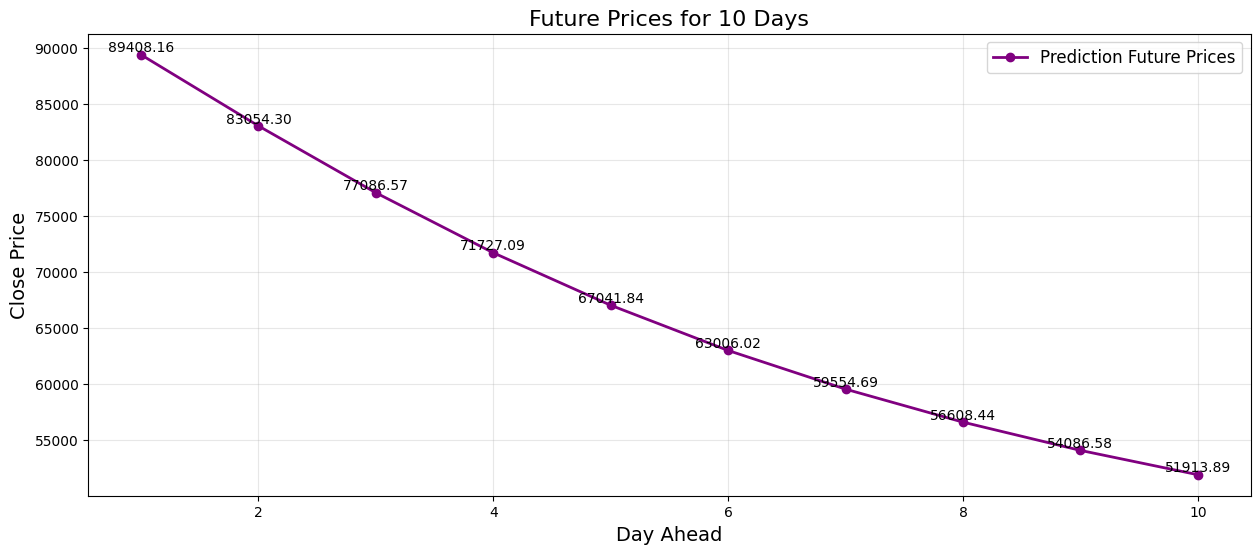

In [ ]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
model.save("model.keras")